In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline

### Formatting Data

In [2]:
allport = pd.read_csv(r'All-Portfolio-Return.csv')
exjan = pd.read_csv('Excluding-Jan.csv')
injan = pd.read_csv('Including-Jan.csv')
allport

,Date,End Month,Long Port,Short Port,Total Port,S&P,Long Alpha,Short Alpha,Total Alpha
0,1/4/2019,Jan,0.1938,-0.2555,-0.0309,0.0690,0.1248,-0.3245,-0.0998
1,2/1/2019,Feb,0.0503,0.0009,0.0256,0.0359,0.0144,-0.0350,-0.0103
2,3/1/2019,Mar,-0.0424,0.1079,0.0328,0.0110,-0.0533,0.0970,0.0218
3,3/29/2019,Apr,-0.0432,0.0737,0.0153,0.0372,-0.0804,0.0365,-0.0220
4,4/26/2019,May,-0.0553,0.0770,0.0109,-0.0387,-0.0166,0.1158,0.0496
5,5/24/2019,Jun,-0.0058,-0.0353,-0.0205,0.0440,-0.0498,-0.0793,-0.0646
6,6/21/2019,Jul,0.0118,0.1293,0.0705,0.0089,0.0029,0.1204,0.0617
7,7/19/2019,Aug,-0.0849,0.0967,0.0059,-0.0295,-0.0554,0.1263,0.0354
8,8/16/2019,Sep,0.0625,-0.0651,-0.0013,0.0411,0.0214,-0.1062,-0.0424
9,9/13/2019,Oct,-0.0644,0.1884,0.0620,-0.0123,-0.0520,0.2007,0.0743


In [3]:
allport = allport.iloc[0:12]
allport

,Date,End Month,Long Port,Short Port,Total Port,S&P,Long Alpha,Short Alpha,Total Alpha
0,1/4/2019,Jan,0.1938,-0.2555,-0.0309,0.0690,0.1248,-0.3245,-0.0998
1,2/1/2019,Feb,0.0503,0.0009,0.0256,0.0359,0.0144,-0.0350,-0.0103
2,3/1/2019,Mar,-0.0424,0.1079,0.0328,0.0110,-0.0533,0.0970,0.0218
3,3/29/2019,Apr,-0.0432,0.0737,0.0153,0.0372,-0.0804,0.0365,-0.0220
4,4/26/2019,May,-0.0553,0.0770,0.0109,-0.0387,-0.0166,0.1158,0.0496
5,5/24/2019,Jun,-0.0058,-0.0353,-0.0205,0.0440,-0.0498,-0.0793,-0.0646
6,6/21/2019,Jul,0.0118,0.1293,0.0705,0.0089,0.0029,0.1204,0.0617
7,7/19/2019,Aug,-0.0849,0.0967,0.0059,-0.0295,-0.0554,0.1263,0.0354
8,8/16/2019,Sep,0.0625,-0.0651,-0.0013,0.0411,0.0214,-0.1062,-0.0424
9,9/13/2019,Oct,-0.0644,0.1884,0.0620,-0.0123,-0.0520,0.2007,0.0743


In [4]:
exjan

,Long Portfolio Avg,Short Portfolio Avg,Total Portfolio Avg,S&P500 Avg
0,-0.0011,0.0489,0.0239,0.0142


In [5]:
injan

,Long Portfolio Avg,Short Portfolio Avg,Total Portfolio Avg,S&P500 Avg
0,0.015163,0.023544,0.019354,0.018732


In [6]:
allportFeb = allport.iloc[1:12]
allportFeb

,Date,End Month,Long Port,Short Port,Total Port,S&P,Long Alpha,Short Alpha,Total Alpha
1,2/1/2019,Feb,0.0503,0.0009,0.0256,0.0359,0.0144,-0.0350,-0.0103
2,3/1/2019,Mar,-0.0424,0.1079,0.0328,0.0110,-0.0533,0.0970,0.0218
3,3/29/2019,Apr,-0.0432,0.0737,0.0153,0.0372,-0.0804,0.0365,-0.0220
4,4/26/2019,May,-0.0553,0.0770,0.0109,-0.0387,-0.0166,0.1158,0.0496
5,5/24/2019,Jun,-0.0058,-0.0353,-0.0205,0.0440,-0.0498,-0.0793,-0.0646
6,6/21/2019,Jul,0.0118,0.1293,0.0705,0.0089,0.0029,0.1204,0.0617
7,7/19/2019,Aug,-0.0849,0.0967,0.0059,-0.0295,-0.0554,0.1263,0.0354
8,8/16/2019,Sep,0.0625,-0.0651,-0.0013,0.0411,0.0214,-0.1062,-0.0424
9,9/13/2019,Oct,-0.0644,0.1884,0.0620,-0.0123,-0.0520,0.2007,0.0743
10,10/11/2019,Nov,0.1291,-0.0437,0.0427,0.0393,0.0898,-0.0830,0.0034


## Long and Short Including Jan

[Text(0, 0, '-10.00%'),
 Text(0, 0, '-5.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '5.00%'),
 Text(0, 0, '10.00%'),
 Text(0, 0, '15.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '25.00%')]

<Figure size 432x288 with 0 Axes>

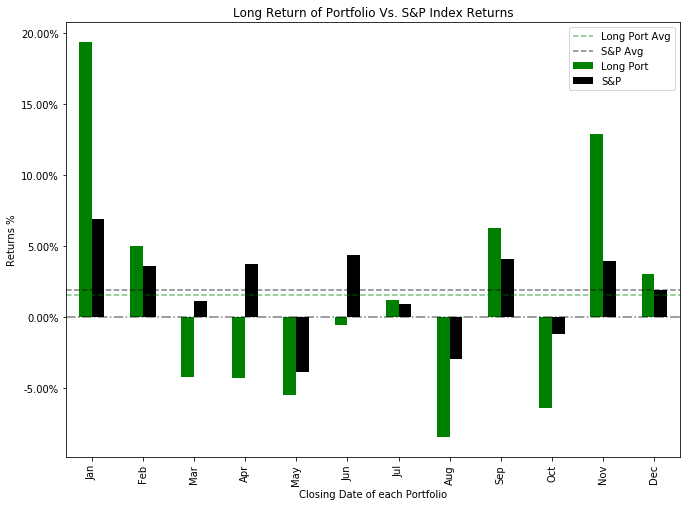

In [32]:
janlong = allport[['End Month', 'Long Port','S&P']]
janlong.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment

ax = janlong.plot.bar(figsize=(11,8), color = "gk")
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= 0.0152 , color='g', linestyle='--', alpha=.5, label = 'Long Port Avg')
plt.axhline(y= 0.0187 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Long Return of Portfolio Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

[Text(0, 0, '-30.00%'),
 Text(0, 0, '-20.00%'),
 Text(0, 0, '-10.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '10.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '30.00%')]

<Figure size 432x288 with 0 Axes>

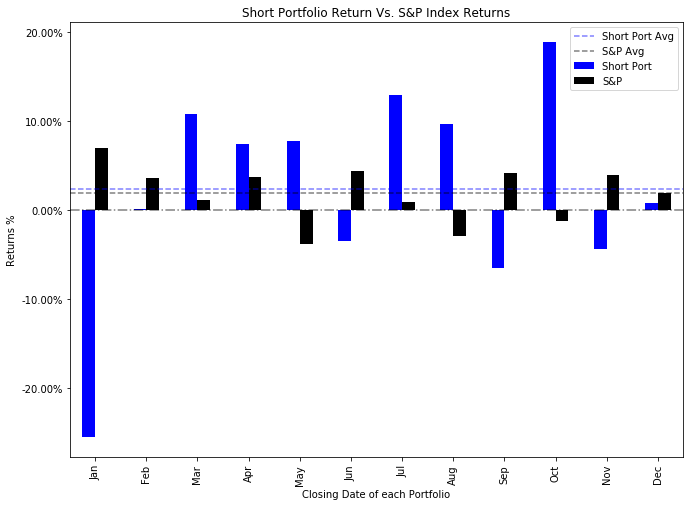

In [8]:
janshort = allport[['End Month', 'Short Port', 'S&P']]
janshort.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment
ax = janshort.plot.bar(figsize=(11,8), color='bk', label = True)
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= 0.0235 , color='b', linestyle='--', alpha=.5, label = 'Short Port Avg')
plt.axhline(y= 0.0187 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Short Portfolio Return Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

[Text(0, 0, '-6.00%'),
 Text(0, 0, '-4.00%'),
 Text(0, 0, '-2.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '6.00%'),
 Text(0, 0, '8.00%')]

<Figure size 432x288 with 0 Axes>

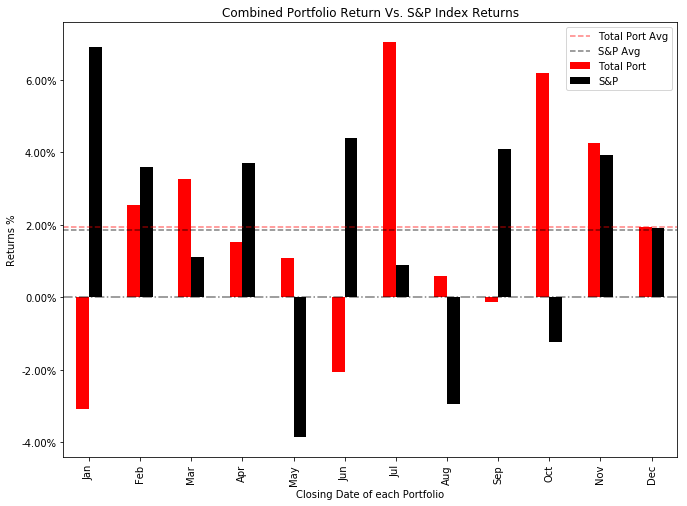

In [9]:
jancombined = allport[['End Month', 'Total Port', 'S&P']]
jancombined.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment

ax = jancombined.plot.bar(figsize=(11,8), color = 'rk')
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= 0.0194 , color='r', linestyle='--', alpha=.5, label = 'Total Port Avg')
plt.axhline(y= 0.0187 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Combined Portfolio Return Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

## Long and SHort Excluding Jan

[Text(0, 0, '-10.00%'),
 Text(0, 0, '-5.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '5.00%'),
 Text(0, 0, '10.00%'),
 Text(0, 0, '15.00%')]

<Figure size 432x288 with 0 Axes>

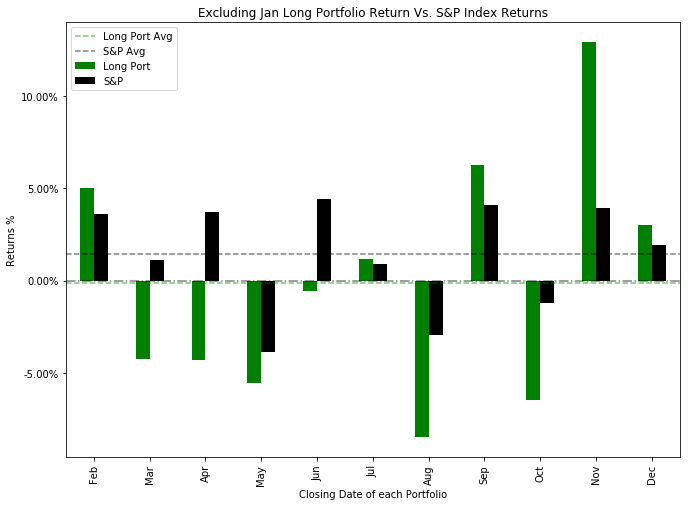

In [33]:
feblong = allportFeb[['End Month', 'Long Port', 'S&P']]
feblong.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment

ax = feblong.plot.bar(figsize=(11,8), color = "gk")
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= -0.0011 , color='g', linestyle='--', alpha=.5, label = 'Long Port Avg')
plt.axhline(y= 0.0142 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Excluding Jan Long Portfolio Return Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

[Text(0, 0, '-10.00%'),
 Text(0, 0, '-5.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '5.00%'),
 Text(0, 0, '10.00%'),
 Text(0, 0, '15.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '25.00%')]

<Figure size 432x288 with 0 Axes>

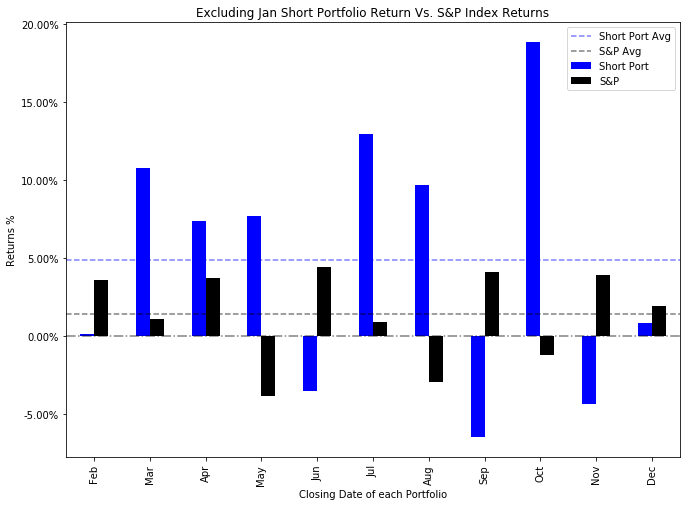

In [30]:
febshort = allportFeb[['End Month', 'Short Port', 'S&P']]
febshort.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment
ax = febshort.plot.bar(figsize=(11,8), color='bk', label = True)
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= 0.0489 , color='b', linestyle='--', alpha=.5, label = 'Short Port Avg')
plt.axhline(y= 0.0142 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Excluding Jan Short Portfolio Return Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

[Text(0, 0, '-6.00%'),
 Text(0, 0, '-4.00%'),
 Text(0, 0, '-2.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '6.00%'),
 Text(0, 0, '8.00%')]

<Figure size 432x288 with 0 Axes>

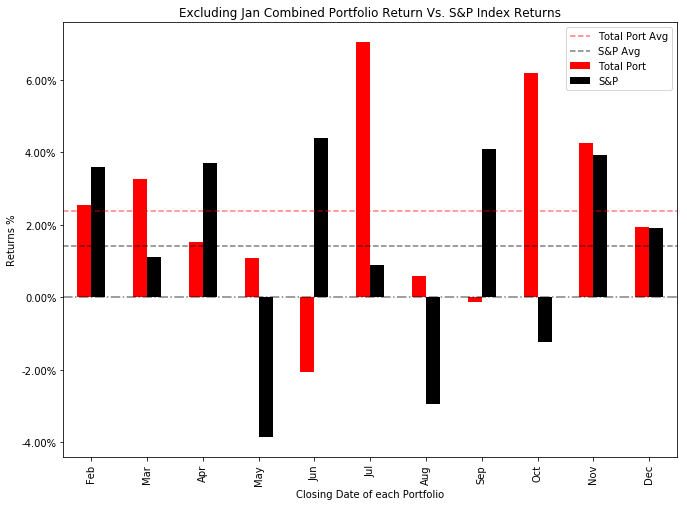

In [31]:
Febcombined = allportFeb[['End Month', 'Total Port', 'S&P']]
Febcombined.set_index('End Month',inplace=True)

fig = plt.figure() # initiate the figure environment

ax = Febcombined.plot.bar(figsize=(11,8), color = 'rk')
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.axhline(y= 0.0239 , color='r', linestyle='--', alpha=.5, label = 'Total Port Avg')
plt.axhline(y= 0.0142 , color='k', linestyle='--', alpha=.5, label = 'S&P Avg')
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Excluding Jan Combined Portfolio Return Vs. S&P Index Returns')
plt.legend()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

## Jan vs no Jan Performance

[Text(0, 0, '0.00%'),
 Text(0, 0, '0.50%'),
 Text(0, 0, '1.00%'),
 Text(0, 0, '1.50%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '2.50%')]

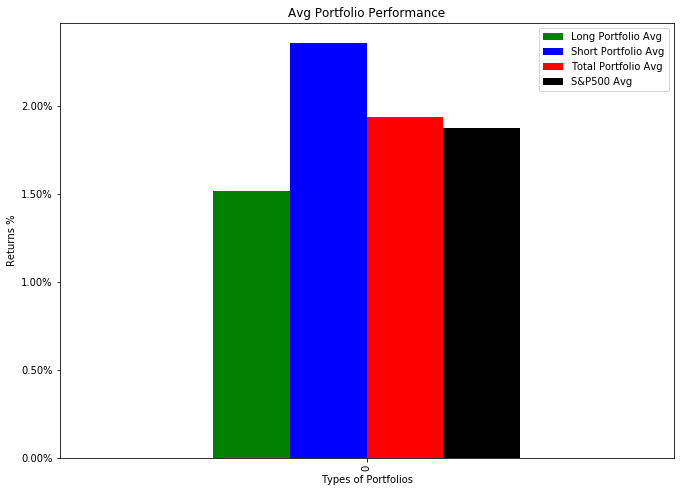

In [26]:
ax = injan.plot.bar(figsize=(11,8), color = 'gbrk')

plt.ylabel('Returns %')
plt.xlabel('Types of Portfolios')
plt.title('Avg Portfolio Performance')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

[Text(0, 0, '-1.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '1.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '3.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '5.00%'),
 Text(0, 0, '6.00%')]

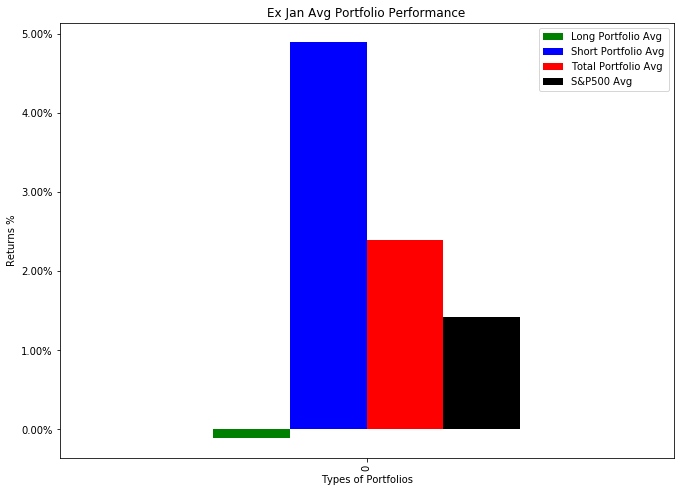

In [28]:
ax = exjan.plot.bar(figsize=(11,8), color = 'gbrk')
plt.ylabel('Returns %')
plt.xlabel('Types of Portfolios')
plt.title('Ex Jan Avg Portfolio Performance')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])